In [6]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
trainingdata=pd.read_csv('C:/Users/Robert/Desktop/ALS_TrainingData_2223 (1).csv')
testingdata=pd.read_excel('C:/Users/Robert/Desktop/ALS_TestingData_788.xlsx')
df = pd.concat([testingdata, trainingdata])
df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
0,3,65.906849,46.0,44.0,43.0,0.024590,-1.767329,33,5.0,2,...,0,0.006440,6.5,6.00,6.0,0.004098,8.57,7.680,6.60,0.016148
1,4,54.000000,39.0,36.0,33.0,0.013100,-1.351852,32,23.0,14,...,0,0.013100,6.5,5.50,5.0,0.003275,8.04,6.620,4.97,0.006703
2,5,56.394521,46.0,43.0,39.0,0.009736,-0.412429,15,10.0,2,...,0,0.000000,7.5,6.75,6.0,0.003456,8.90,7.160,5.01,0.005410
3,6,72.619178,50.0,42.5,41.0,0.092784,-0.383403,34,24.0,21,...,5,0.007752,7.5,7.00,6.0,0.024194,12.38,7.905,4.96,0.076495
4,9,65.000000,45.0,42.0,36.0,0.021327,0.000000,37,37.0,37,...,7,0.000000,6.0,5.50,5.0,0.002370,11.53,9.290,7.94,0.008507


In [9]:
df.shape

(2301, 131)

In [10]:
df.isnull().sum()

ID                                  0
Age_mean                            0
Albumin_max                         0
Albumin_median                      0
Albumin_min                         0
                                 ... 
Urine.Ph_range                   2223
White.Blood.Cell..WBC._max       2223
White.Blood.Cell..WBC._median    2223
White.Blood.Cell..WBC._min       2223
White.Blood.Cell..WBC._range     2223
Length: 131, dtype: int64

In [11]:
#droping the null values
df=df.dropna()
df.shape

(78, 131)

In [12]:
df.isnull().sum()

ID                               0
Age_mean                         0
Albumin_max                      0
Albumin_median                   0
Albumin_min                      0
                                ..
Urine.Ph_range                   0
White.Blood.Cell..WBC._max       0
White.Blood.Cell..WBC._median    0
White.Blood.Cell..WBC._min       0
White.Blood.Cell..WBC._range     0
Length: 131, dtype: int64

In [13]:
del df["ID"]
del df["SubjectID"]
df.shape

(78, 129)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 77
Columns: 129 entries, Age_mean to White.Blood.Cell..WBC._range
dtypes: float64(106), int64(23)
memory usage: 79.2 KB


In [83]:
df.describe()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,...,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,56.025571,45.256410,42.173077,38.910256,0.016753,-0.825866,29.807692,21.544872,14.705128,0.028159,...,1.871795,0.007133,7.076923,6.192308,5.564103,0.004544,9.341795,6.789103,5.286026,0.012203
std,10.514606,3.056549,3.083341,3.977815,0.013419,0.649497,6.107389,8.995015,9.532050,0.014650,...,2.211886,0.003980,0.674570,0.572536,0.458392,0.004776,2.939529,1.683264,1.513861,0.014724
min,24.583562,38.000000,35.000000,25.000000,0.004138,-3.041667,13.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,6.000000,5.500000,5.000000,0.000000,4.110000,3.240000,1.430000,0.003078
25%,51.000000,43.000000,40.000000,36.250000,0.011006,-1.315287,26.000000,16.500000,8.000000,0.017005,...,0.000000,0.004490,6.500000,5.812500,5.000000,0.002278,7.767500,5.878750,4.330000,0.005658
50%,57.000000,45.500000,42.250000,39.000000,0.013761,-0.679723,31.000000,22.000000,14.000000,0.026720,...,1.000000,0.006365,7.000000,6.000000,5.500000,0.003390,8.750000,6.720000,5.320000,0.008402
75%,62.180822,47.000000,44.000000,41.000000,0.018015,-0.390660,34.000000,28.000000,21.000000,0.035912,...,3.000000,0.009639,7.500000,6.500000,6.000000,0.004715,10.690000,7.730000,6.125000,0.012471
max,77.000000,51.000000,49.000000,47.000000,0.092784,0.325893,40.000000,39.000000,37.000000,0.068522,...,7.000000,0.019048,9.000000,7.500000,7.000000,0.034483,22.490000,11.795000,9.500000,0.092045


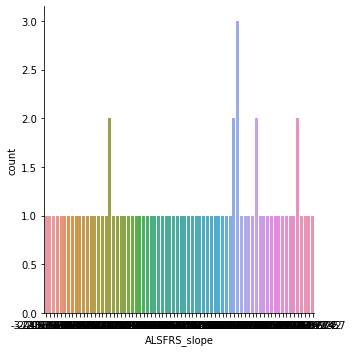

In [14]:
import seaborn as sns
sns.catplot(x='ALSFRS_slope', data = df, kind = 'count')

In [22]:
correlation = df.corr()
print(correlation)

                               Age_mean  Albumin_max  Albumin_median  \
Age_mean                       1.000000    -0.382177       -0.450672   
Albumin_max                   -0.382177     1.000000        0.925740   
Albumin_median                -0.450672     0.925740        1.000000   
Albumin_min                   -0.421760     0.809441        0.884381   
Albumin_range                  0.283290     0.047615       -0.085904   
...                                 ...          ...             ...   
Urine.Ph_range                 0.182032     0.066635       -0.012802   
White.Blood.Cell..WBC._max    -0.027384    -0.140643       -0.173968   
White.Blood.Cell..WBC._median -0.212620    -0.255948       -0.219332   
White.Blood.Cell..WBC._min    -0.266203    -0.188273       -0.116234   
White.Blood.Cell..WBC._range  -0.034097     0.041103       -0.046010   

                               Albumin_min  Albumin_range  ALSFRS_slope  \
Age_mean                         -0.421760       0.283290   

In [23]:
#investigating elements within each feature
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Age_mean :66
The number of values for feature Albumin_max :15
The number of values for feature Albumin_median :23
The number of values for feature Albumin_min :18
The number of values for feature Albumin_range :70
The number of values for feature ALSFRS_slope :72
The number of values for feature ALSFRS_Total_max :25
The number of values for feature ALSFRS_Total_median :40
The number of values for feature ALSFRS_Total_min :32
The number of values for feature ALSFRS_Total_range :78
The number of values for feature ALT.SGPT._max :46
The number of values for feature ALT.SGPT._median :49
The number of values for feature ALT.SGPT._min :32
The number of values for feature ALT.SGPT._range :77
The number of values for feature AST.SGOT._max :41
The number of values for feature AST.SGOT._median :39
The number of values for feature AST.SGOT._min :24
The number of values for feature AST.SGOT._range :76
The number of values for feature Basophils_max :26
The number of

In [24]:
df.columns

Index(['Age_mean', 'Albumin_max', 'Albumin_median', 'Albumin_min',
       'Albumin_range', 'ALSFRS_slope', 'ALSFRS_Total_max',
       'ALSFRS_Total_median', 'ALSFRS_Total_min', 'ALSFRS_Total_range',
       ...
       'trunk_min', 'trunk_range', 'Urine.Ph_max', 'Urine.Ph_median',
       'Urine.Ph_min', 'Urine.Ph_range', 'White.Blood.Cell..WBC._max',
       'White.Blood.Cell..WBC._median', 'White.Blood.Cell..WBC._min',
       'White.Blood.Cell..WBC._range'],
      dtype='object', length=129)

In [25]:
x = df.iloc[:].values

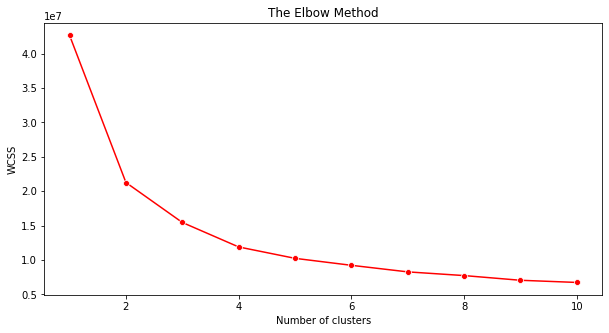

In [26]:
#Finding optimal number of clusters using the elbow method 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
    

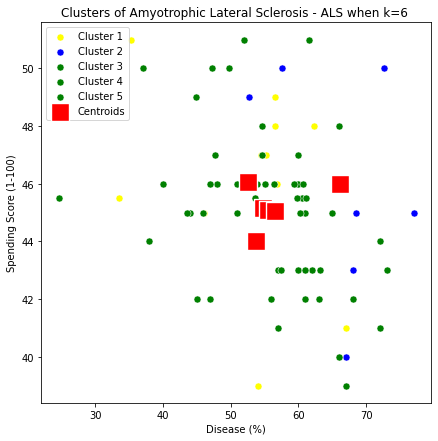

In [28]:
# Visualising the clusters
plt.figure(figsize=(7,7))
sns.scatterplot(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], color = 'green', label = 'Cluster 4',s=50)
sns.scatterplot(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], color = 'green', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of Amyotrophic Lateral Sclerosis - ALS when k=6 ')
plt.xlabel('Disease (%)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

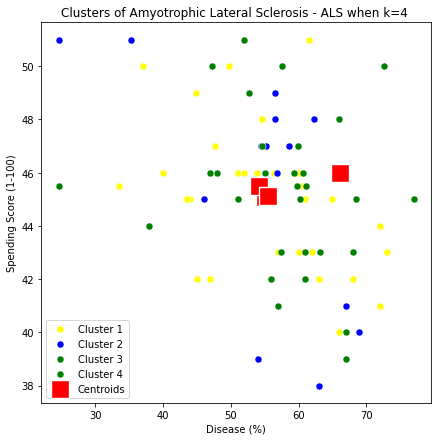

In [34]:
#K=4
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
plt.figure(figsize=(7,7))
sns.scatterplot(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], color = 'green', label = 'Cluster 4',s=50)
sns.scatterplot(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], color = 'green', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of Amyotrophic Lateral Sclerosis - ALS when k=4 ')
plt.xlabel('Disease (%)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

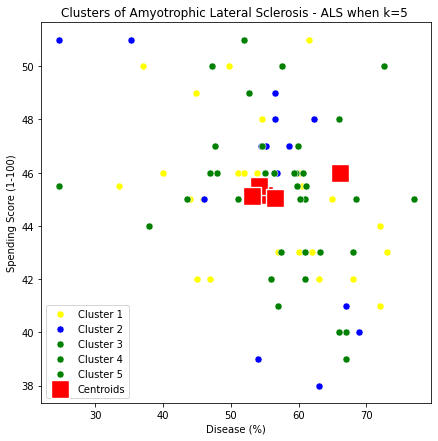

In [38]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
plt.figure(figsize=(7,7))
sns.scatterplot(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], color = 'green', label = 'Cluster 4',s=50)
sns.scatterplot(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], color = 'green', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of Amyotrophic Lateral Sclerosis - ALS when k=5 ')
plt.xlabel('Disease (%)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [82]:
kmeans.cluster_centers_

array([[ 5.48778714e+01,  4.51538462e+01,  4.23653846e+01,
         3.90384615e+01,  1.42726853e-02, -7.79321540e-01,
         3.04615385e+01,  2.38846154e+01,  1.76153846e+01,
         2.52437805e-02,  6.32307692e+01,  3.31923077e+01,
         2.35000000e+01,  9.02154995e-02,  5.69230769e+01,
         2.92692308e+01,  2.15384615e+01,  8.38075812e-02,
         1.60769231e+00,  7.09615385e-01,  3.80769231e-01,
         2.77718723e-03,  2.69653846e+01,  2.31384615e+01,
         1.97730769e+01,  1.69563043e-02,  1.33073077e+01,
         9.26788462e+00,  6.00769231e+00,  1.77753704e-02,
         8.40703846e+00,  6.01998077e+00,  4.38615385e+00,
         9.47056692e-03,  2.61630569e-03,  9.00000000e+01,
         8.06923077e+01,  6.95384615e+01,  4.90475492e-02,
         1.42384615e+02,  1.25057692e+02,  1.10038462e+02,
         7.54626109e-02,  2.54365385e+00,  2.42240385e+00,
         2.28288462e+00,  6.27005038e-04,  1.06115385e+02,
         1.03057692e+02,  1.00038462e+02,  1.37121877e-0